In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [32]:
# create engine to hawaii.sqlite

database_path = "../Resources/hawaii.sqlite"

engine = create_engine(f"sqlite:///{database_path}")

In [33]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [34]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
from sqlalchemy import inspect

inspector = inspect(engine)

measurement_columns = inspector.get_columns('Measurement')
for mc in measurement_columns:
    print(mc["name"], mc["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [38]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [39]:
station_columns = inspector.get_columns('Station')
for sc in station_columns:
    print(sc["name"], sc["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [40]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [41]:
# Find the most recent date in the data set.
for recent_date in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    print(recent_date)

2017-08-23


In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One Year from Last Date:", previous_year)

One Year from Last Date: 2016-08-23


In [43]:
# Perform a query to retrieve the date and precipitation scores
prev_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()
prev_year_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [44]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prev_year_prcp_df = pd.DataFrame(prev_year_prcp, columns = ['Date', 'Precipitation'])
prev_year_prcp_df.set_index('Date', inplace = True)
prev_year_prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [45]:
# Sort the dataframe by date
df_sorted = prev_year_prcp_df.sort_values('Date')
df_sorted

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


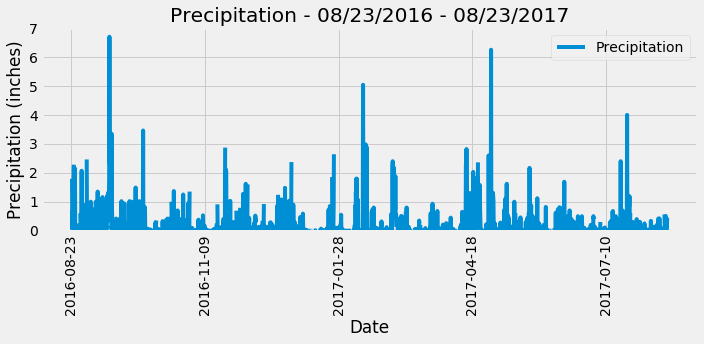

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
# df_sorted.plot('Date', 'Precipitation', rot=90, figsize = (10, 5))
# plt.ylim(0, 8)
# plt.xlabel('Date')
# plt.ylabel('Precipitation (inches)')
# plt.title('Precipitation - 08/23/2016 - 08/23/2017')
# plt.savefig("../Images/precipitation.png")
# plt.legend(loc="best")
# #plt.show()

fig, ax = plt.subplots(figsize = (10, 5))
df_sorted.plot(ax = ax, x_compat = True, rot = 90)
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_title('Precipitation - 08/23/2016 - 08/23/2017')
#ax.set_xticks
plt.ylim(0, 7)
plt.savefig("../Images/precipitation.png")
plt.tight_layout()
plt.show()

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).filter(Station.id).count()
print(f"There are {station_count} stations in the dataset.")

There are 9 stations in the dataset.


In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

# session.execute('''
# SELECT COUNT(*), station
# FROM measurement
# GROUP BY station
# ORDER BY COUNT(*) DESC
# ''').fetchall()

station_activity = (session.query(Measurement.station, func.count(Measurement.station))\
               .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# What stations have the most rows?

most_active = (session.query(Measurement.station)\
               .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first())
print(f"Station {most_active} has the most amount of observations.")

Station ('USC00519281',) has the most amount of observations.


In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

tobs = [Measurement.station, 
       func.min(Measurement.tobs),
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
most_active_calc = session.query(*tobs).filter(Measurement.station == "USC00519281").all()

most_active_calc_df = pd.DataFrame(most_active_calc, columns = ['Station', 'Min Temp', 'Max Temp', 'Avg Temp'])
most_active_calc_df

,Station,Min Temp,Max Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

prev_year_tobs = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= previous_year)\
    .filter(Measurement.station == 'USC00519281').all()
prev_year_tobs

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [66]:
prev_year_tobs_df = pd.DataFrame(prev_year_tobs, columns = ['Station', 'Date', 'TOBS'])
prev_year_tobs_df.set_index('Date', inplace = True)
prev_year_tobs_df.head()

,Station,TOBS
Date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


In [67]:
tobs_df_sorted = prev_year_tobs_df.sort_values('Date')
tobs_df_sorted

,Station,TOBS
Date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0
...,...,...
2017-08-14,USC00519281,77.0
2017-08-15,USC00519281,77.0
2017-08-16,USC00519281,76.0


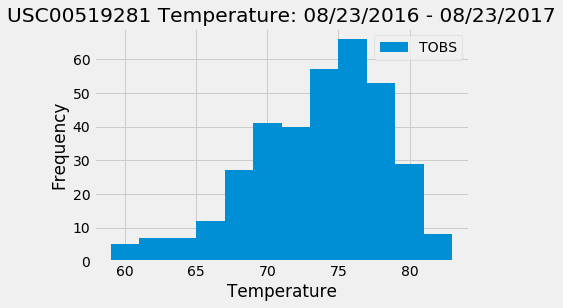

In [71]:
# Plot the results as a histogram

tobs_df_sorted.plot.hist(by=None, bins=12)
plt.xlabel('Temperature')
plt.title('USC00519281 Temperature: 08/23/2016 - 08/23/2017')
plt.savefig("../Images/tobs.png")
plt.legend(loc="best")
plt.show()

# Close session

In [72]:
# Close Session
session.close()